In [3]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from dask.distributed import Client

%matplotlib inline

/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/appli/conda-env/3.6/pangeo/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
maindir='/home1/scratch/ctalandi/exp_close2/TEST5/'
file_ice='ICE_canal_1d_00010101_00011231_icemod_000101-000101.nc'
file_T='ICE_canal_1d_00010101_00011231_grid_T_000101-000101.nc'

In [5]:
ds_ice=xr.open_dataset(maindir+file_ice)
ds_T=xr.open_dataset(maindir+file_T)

In [39]:
ds_ice

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, time_counter: 31, x: 501, y: 253)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
    time_centered         (time_counter) object ...
  * time_counter          (time_counter) object 0001-01-01 12:00:00 ... 0001-01-31 12:00:00
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) float64 ...
    time_counter_bounds   (time_counter, axis_nbounds) float64 ...
    simsk                 (time_counter, y, x) float32 ...
    icevolu               (time_counter, y, x) float32 ...
    simass                (time_counter, y, x) float32 ...
    sithic_max            (time_counter, y, x) float32 ...
    sithic_min            (time_counter, y, x) float32 ...
    iceconc               (time_counter, y, x) float32 ...
    iceage                (time_counter, y, x) timedelta64[ns] ...
    vfxice                (time_coun

In [17]:
time=pd.date_range(start="2001-01-01",end="2001-01-31",freq="D")

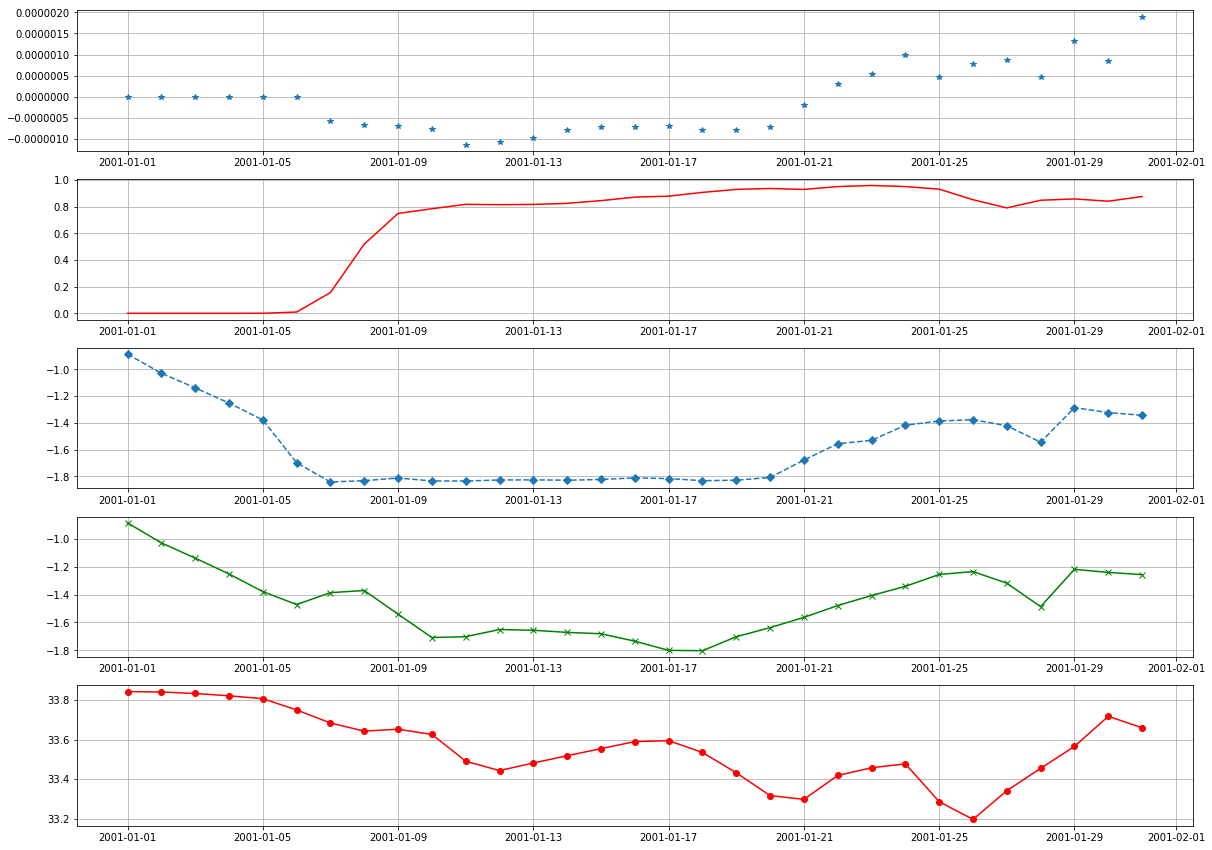

In [43]:
plt.figure(figsize=(20,15))

plt.subplot(511)
plt.plot(time,ds_ice['sfxice'][:,118,365],'*')
plt.grid(True)
plt.subplot(512)
plt.plot(time,ds_ice['iceconc'][:,118,365],'r-')
plt.grid(True)


plt.subplot(513)
plt.plot(time,ds_T['toce'][:,0,118,365],'--D')
plt.grid(True)
plt.subplot(514)
plt.plot(time,ds_T['toce'][:,10,118,365],'g-x')
plt.grid(True)
plt.subplot(515)
plt.plot(time,ds_T['soce'][:,0,118,365],'r-o')
plt.grid(True)


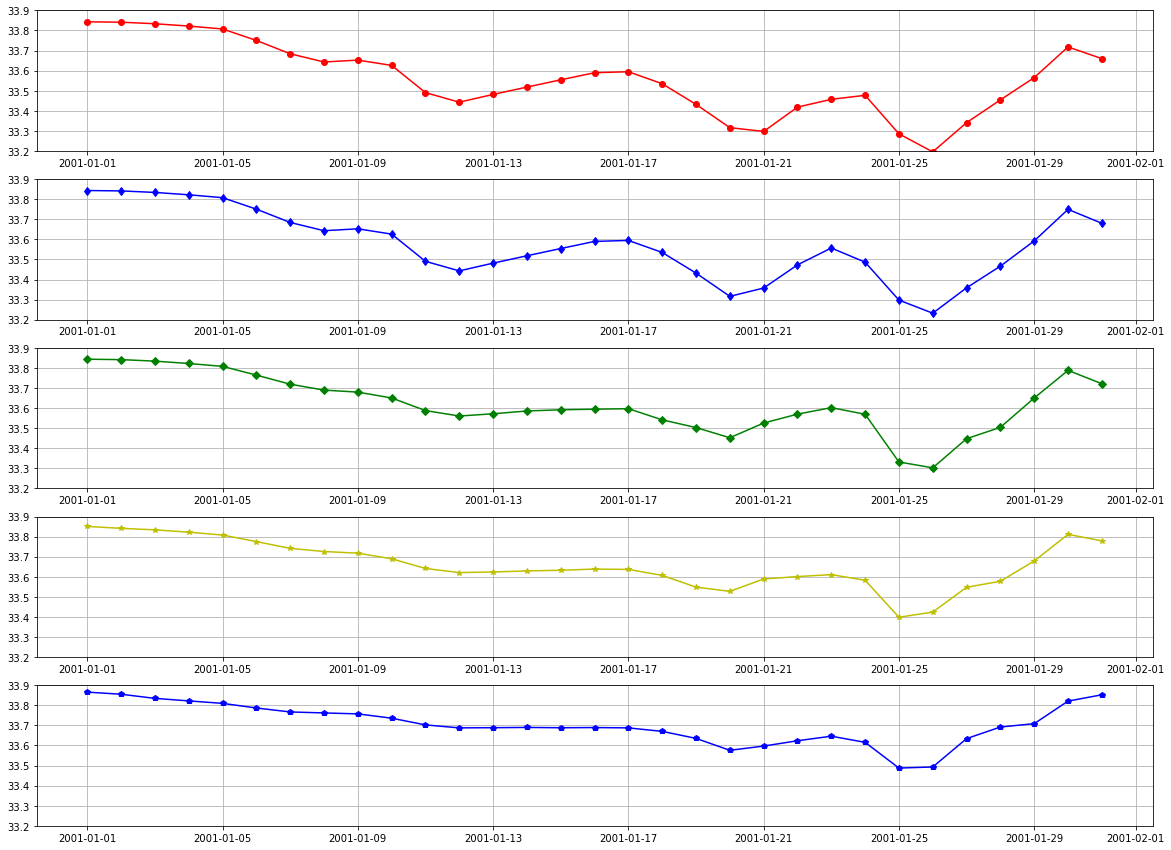

In [63]:
plt.figure(figsize=(20,15))

plt.subplot(511)
plt.plot(time,ds_T['soce'][:,0,118,365],'r-o')
plt.ylim([33.2,33.9])
plt.grid(True)

plt.subplot(512)
plt.plot(time,ds_T['soce'][:,4,118,365],'b-d')
plt.ylim([33.2,33.9])
plt.grid(True)

plt.subplot(513)
plt.plot(time,ds_T['soce'][:,9,118,365],'g-D')
plt.ylim([33.2,33.9])
plt.grid(True)

plt.subplot(514)
plt.plot(time,ds_T['soce'][:,14,118,365],'y-*')
plt.ylim([33.2,33.9])
plt.grid(True)

plt.subplot(515)
plt.plot(time,ds_T['soce'][:,20,118,365],'b-p')
plt.ylim([33.2,33.9])
plt.grid(True)





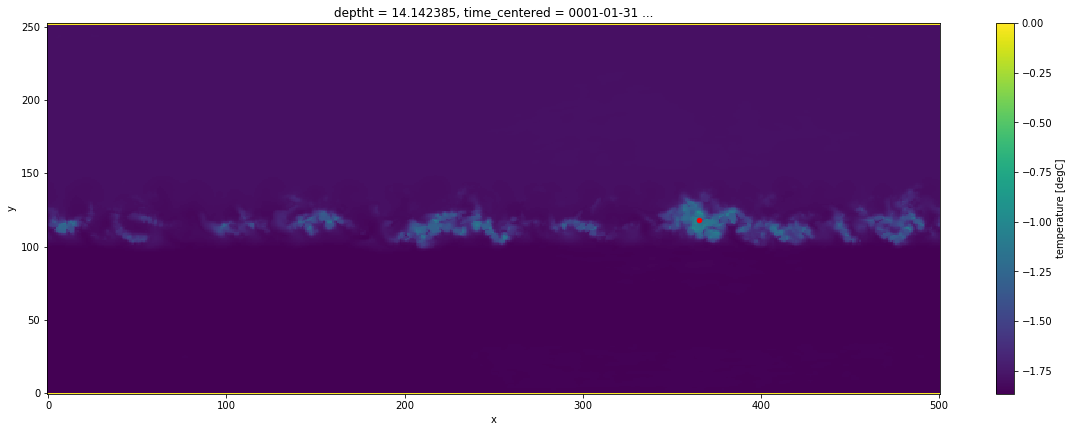

In [56]:
plt.figure(figsize=(20,15))

plt.subplot(211)
#plt.contourf(ds_T['toce'][30,0,:,:])
ds_T['toce'][30,10,:,:].plot()
plt.scatter(365,118,s=20,color='r',marker='o')



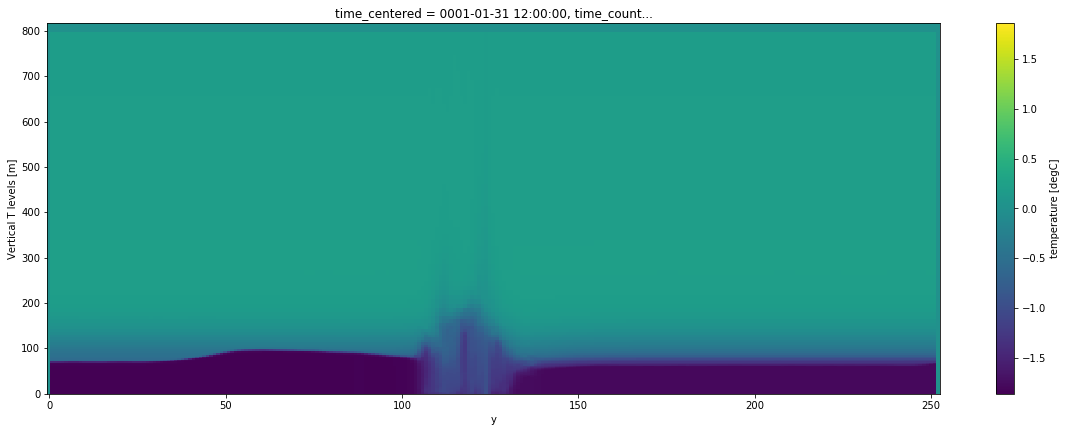

In [62]:
plt.figure(figsize=(20,15))

plt.subplot(211)
#plt.contourf(ds_T['toce'][30,0,:,:])
ds_T['toce'][30,:,:,365].plot(cmap='viridis')
#plt.scatter(365,118,s=20,color='r',marker='o')




In [8]:
main_dir='/home1/scratch/ctalandi/MY_ICE_CANAL/NEW_TKE_INIT_nn_etau0/'
ds_T=xr.open_mfdataset(main_dir+'ICE_canal_1h_00010101_00010104_grid_T_*.nc')
ds_W=xr.open_mfdataset(main_dir+'ICE_canal_1h_00010101_00010104_grid_W_*.nc')

In [6]:
ds_T

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 501, time_counter: 83, x: 201, y: 103)
Coordinates:
    nav_lat               (y, x) float32 -255.0 -255.0 -255.0 ... 255.0 255.0
    nav_lon               (y, x) float32 -500.0 -495.0 -490.0 ... 495.0 500.0
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 498.5 499.5 500.5
    time_centered         (time_counter) object dask.array<shape=(83,), chunksize=(24,)>
  * time_counter          (time_counter) object 0001-01-01 00:30:00 ... 0001-01-04 10:30:00
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    deptht_bounds         (time_counter, deptht, axis_nbounds) float32 dask.array<shape=(83, 501, 2), chunksize=(24, 501, 2)>
    time_centered_bounds  (time_counter, axis_nbounds) float64 dask.array<shape=(83, 2), chunksize=(24, 2)>
    time_counter_bounds   (time_counter, axis_nbounds) float64 dask.array<shape=(83, 2), chunksize=(24, 2)>
    toce                  (time_counter, deptht, y, 

In [10]:
ds_W

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depthw: 501, time_counter: 83, x: 201, y: 103)
Coordinates:
    nav_lat               (y, x) float32 -255.0 -255.0 -255.0 ... 255.0 255.0
    nav_lon               (y, x) float32 -500.0 -495.0 -490.0 ... 495.0 500.0
  * depthw                (depthw) float32 0.0 1.0 2.0 3.0 ... 498.0 499.0 500.0
    time_centered         (time_counter) object dask.array<shape=(83,), chunksize=(24,)>
  * time_counter          (time_counter) object 0001-01-01 00:30:00 ... 0001-01-04 10:30:00
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthw_bounds         (time_counter, depthw, axis_nbounds) float32 dask.array<shape=(83, 501, 2), chunksize=(24, 501, 2)>
    time_centered_bounds  (time_counter, axis_nbounds) float64 dask.array<shape=(83, 2), chunksize=(24, 2)>
    time_counter_bounds   (time_counter, axis_nbounds) float64 dask.array<shape=(83, 2), chunksize=(24, 2)>
    woce                  (time_counter, depthw, y, 

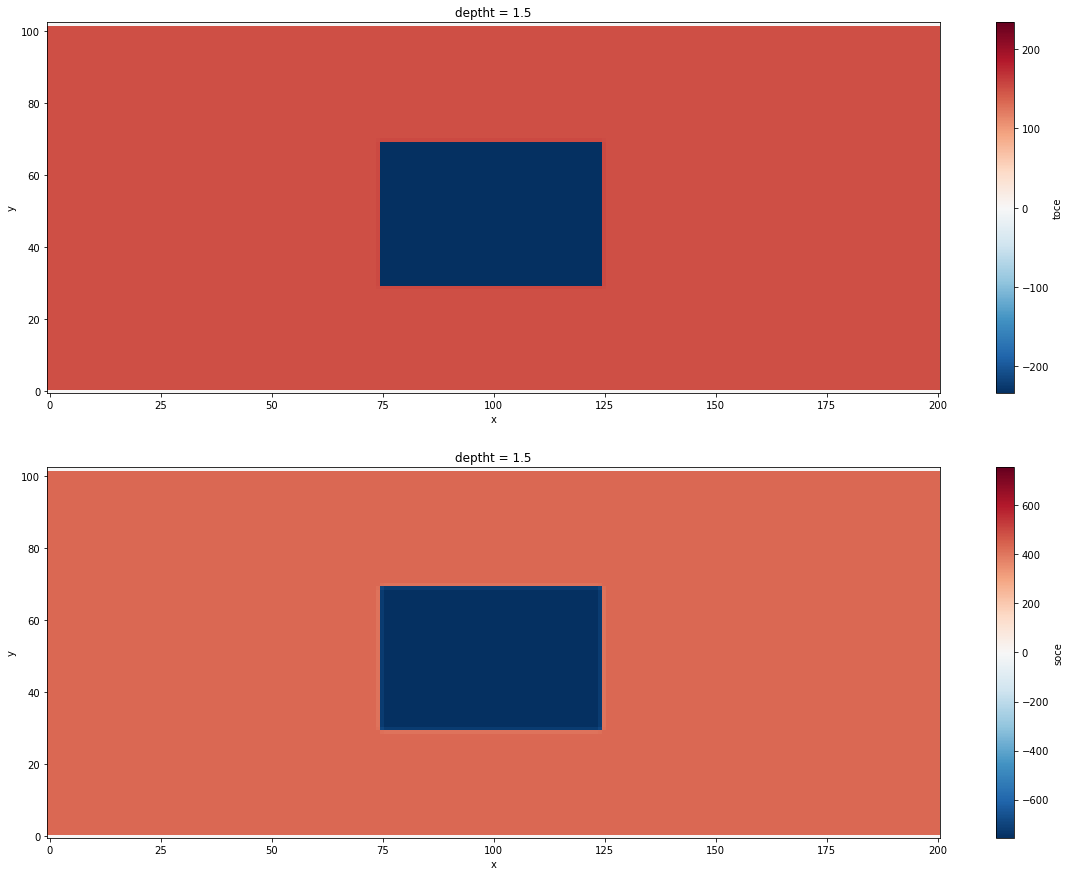

In [28]:
plt.figure(figsize=(20,15))

itime=1 ; m_alpha=1e6
plt.subplot(211)
((ds_T['toce'].isel(time_counter=itime,deptht=1)-ds_T['toce'].isel(time_counter=0,deptht=1))*m_alpha).plot()

plt.subplot(212)
((ds_T['soce'].isel(time_counter=itime,deptht=1)-ds_T['soce'].isel(time_counter=0,deptht=1))*m_alpha).plot()

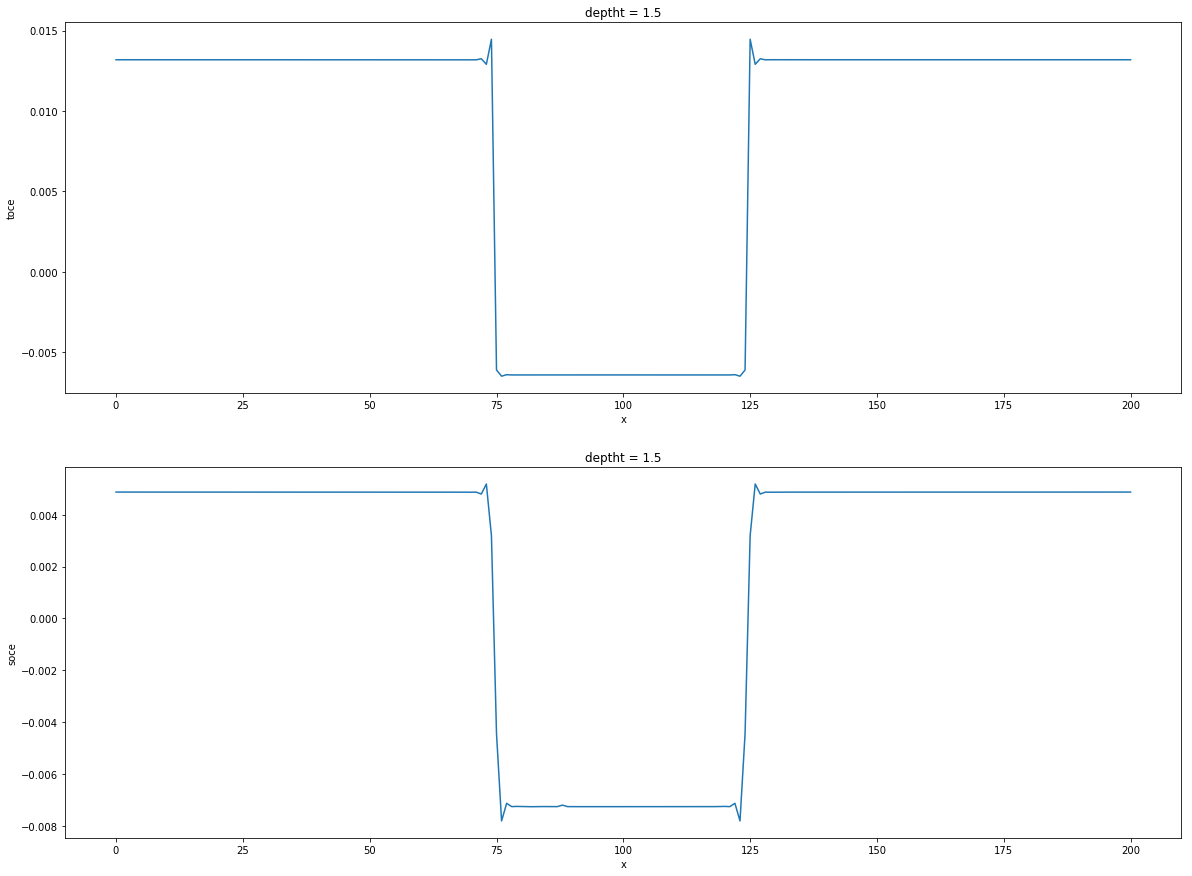

In [36]:
plt.figure(figsize=(20,15))

itime=11 ; m_alpha=1. ; i_y=51
plt.subplot(211)
((ds_T['toce'].isel(time_counter=itime,y=i_y,deptht=1)-ds_T['toce'].isel(time_counter=0,y=i_y,deptht=1))*m_alpha).plot()

plt.subplot(212)
((ds_T['soce'].isel(time_counter=itime,y=i_y,deptht=1)-ds_T['soce'].isel(time_counter=0,y=i_y,deptht=1))*m_alpha).plot()

TypeError: Plotting requires coordinates to be numeric or dates of type np.datetime64 or datetime.datetime or pd.Interval.

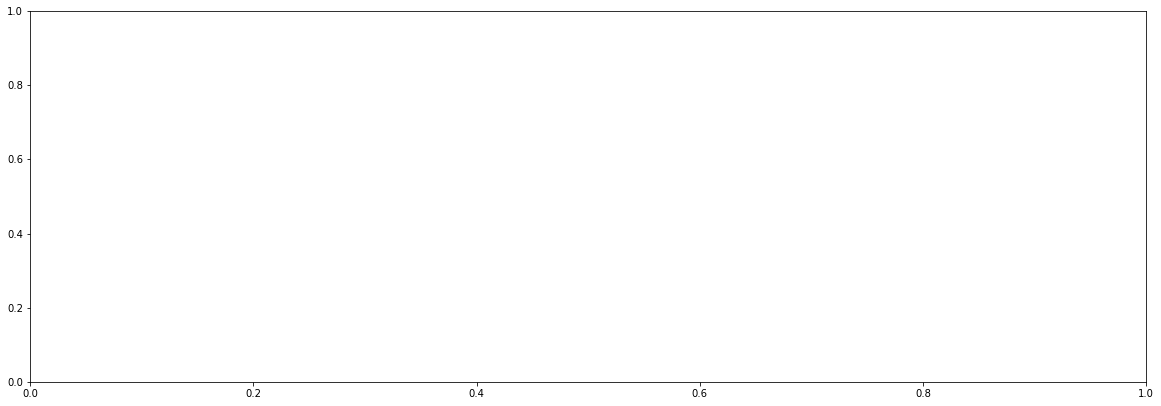

In [39]:
plt.figure(figsize=(20,15))

itime=11 ; m_alpha=1. ; i_x=100 ; i_y=51
plt.subplot(211)
ds_T['toce'][:,1,i_y,i_x].plot()
#.isel(x=i_x,y=i_y,deptht=1).plot()

plt.subplot(212)
ds_T['soce'].isel(x=i_x,y=i_y,deptht=1).plot()

In [40]:
ds_T['time_counter']

<xarray.DataArray 'time_counter' (time_counter: 83)>
array([cftime.DatetimeNoLeap(1, 1, 1, 0, 30, 0, 13, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 1, 30, 0, 10, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 2, 30, 0, 6, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 3, 30, 0, 13, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 4, 30, 0, 10, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 5, 30, 0, 6, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 6, 30, 0, 13, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 7, 30, 0, 10, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 8, 30, 0, 6, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 9, 30, 0, 13, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 10, 30, 0, 10, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 11, 30, 0, 6, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 12, 30, 0, 13, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 13, 30, 0, 10, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 14, 30, 0, 6, 1, 1),
       cftime.DatetimeNoLeap(1, 1, 1, 15, 30, 0, 13, 1, 1),
  

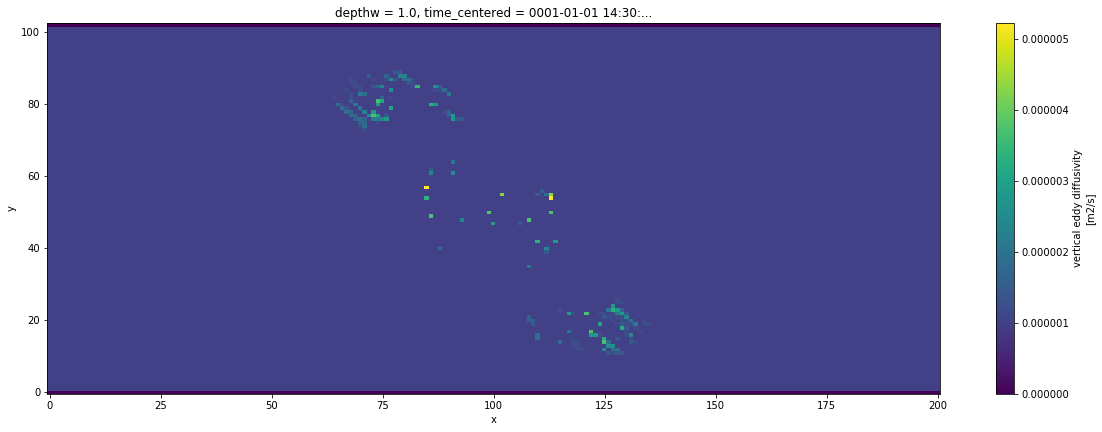

In [12]:
plt.figure(figsize=(20,15))

itime=14
plt.subplot(211)
#(ds_W['avt'].isel(time_counter=itime,depthw=0)-ds_W['avt'].isel(time_counter=0,depthw=0)).plot()
ds_W['avt'].isel(time_counter=itime,depthw=1) .plot()

In [10]:
if True:
    dsout=xr.Dataset()

    #dsout['time_counter']=(('time_counter'),0.)
    dsout['tmask']=(('time_counter','nav_lev','y','x'),ds_tmsk['tmask'])
    dsout['umask']=(('time_counter','nav_lev','y','x'),ds_tmsk['umask'])
    dsout['vmask']=(('time_counter','nav_lev','y','x'),ds_tmsk['vmask'])

    dsout.to_netcdf('./SEDNA_UVmask_20210820_Bering_Glorys12v1Zoom.nc', unlimited_dims={'time_counter':True})